In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

from scipy import stats
from scipy import constants
from scipy.optimize import minimize, Bounds
from mpl_toolkits.axes_grid1 import make_axes_locatable
import types
from sklearn.model_selection import train_test_split
import matplotlib.colors as colors

In [3]:
UView = {

        'x': [-12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -12.696, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, -7.5, 121.6674, 121.6677, 121.6679, 121.6671, 121.6673, 121.6677, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 121.667, 126.8635, 126.8638, 126.863, 126.8632, 126.8634, 126.8637, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 126.863, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 256.021, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 261.217, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 390.375, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 395.571, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 524.725, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 529.921, 659.065,  659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 659.065, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 664.261, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 793.407, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 798.603, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 927.737, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933, 932.933],

        'y': [-64.3105, -58.2588, -52.207, -46.1552, -40.1034, -34.0517, -27.9999, -21.9481, -15.8963, -9.84457, -3.7928, 2.25898, 8.31075, 14.3625, 20.4143, 26.4661, 32.5178, 38.5696, 44.6214, 50.6732, 56.7249, 62.7767, 68.8285, 74.8803, 80.932, 86.9838, 93.0356, 99.0874, 105.139, 111.191, 117.243, 123.294, -61.2846, -55.2329, -49.1811, -43.1293, -37.0775, -31.0258, -24.974, -18.9222, -12.8704, -6.81867, -0.766897, 5.28488, 11.3367, 17.3884, 23.4402, 29.492, 35.5437, 41.5955, 47.6473, 53.6991, 59.7508, 65.8026, 71.8544, 77.9062, 83.9579, 90.0097, 96.0615, 102.113, 108.165, 114.217, 120.269, 126.32, -34.5014, -28.4497, -22.3979, -16.3461, -10.2943, -4.24257, 1.80921, 7.86098, 13.9128, 19.9645, 26.0163, 32.0681, 38.1198, 44.1716, 50.2234, 56.2752, 62.3269, 68.3787, 74.4305, 80.4823, 86.534, 92.5858, 98.6376, 104.689, 110.741, 116.793, 122.845, 128.896, 134.948, 141, 147.052, 153.104, -31.4755, -25.4238, -19.372, -13.3202, -7.26844, -1.21667, 4.83511, 10.8869, 16.9387, 22.9904, 29.0422, 35.094, 41.1457, 47.1975, 53.2493, 59.3011, 65.3528, 71.4046, 77.4564, 83.5082, 89.5599, 95.6117, 101.663, 107.715, 113.767, 119.819, 125.871, 131.922, 137.974, 144.026, 150.078, 156.129, -7.35165, -1.29987, 4.7519, 10.8037, 16.8554, 22.9072, 28.959, 35.0108, 41.0625, 47.1143, 53.1661, 59.2179, 65.2696, 71.3214, 77.3732, 83.425, 89.4767, 95.5285, 101.58, 107.632, 113.684, 119.736, 125.787, 131.839, 137.891, 143.943, 149.994, 156.046, 162.098, 168.15, 174.202, 180.253, -4.32575, 1.72603, 7.7778, 13.8296, 19.8813, 25.9331, 31.9849, 38.0367, 44.0884, 50.1402, 56.192, 62.2438, 68.2955, 74.3473, 80.3991, 86.4509, 92.5026, 98.5544, 104.606, 110.658, 116.71, 122.762, 128.813, 134.865, 140.917, 146.969, 153.02, 159.072, 165.124, 171.176, 177.227, 183.279, 17.1099, 23.1617, 29.2135, 35.2652, 41.317, 47.3688, 53.4206, 59.4723, 65.5241, 71.5759, 77.6277, 83.6794, 89.7312, 95.783, 101.835, 107.887, 113.938, 119.99, 126.042, 132.094, 138.145, 144.197, 150.249, 156.301, 162.352, 168.404, 174.456, 180.508, 186.56, 192.611, 198.663, 204.715, 20.1358, 26.1876, 32.2394, 38.2911, 44.3429, 50.3947, 56.4465, 62.4982, 68.55, 74.6018, 80.6536, 86.7053, 92.7571, 98.8089, 104.861, 110.912, 116.964, 123.016, 129.068, 135.12, 141.171, 147.223, 153.275, 159.327, 165.378, 171.43, 177.482, 183.534, 189.585, 195.637, 201.689, 207.741, 38.8201, 44.8719, 50.9237, 56.9754, 63.0272, 69.079, 75.1308, 81.1825, 87.2343, 93.2861, 99.3379, 105.39, 111.441, 117.493, 123.545, 129.597, 135.649, 141.7, 147.752, 153.804, 159.856, 165.907, 171.959, 178.011, 184.063, 190.114, 196.166, 202.218, 208.27, 214.322, 220.373, 226.425, 41.846, 47.8978, 53.9496, 60.0013, 66.0531, 72.1049, 78.1567, 84.2084, 90.2602, 96.312, 102.364, 108.416, 114.467, 120.519, 126.571, 132.623, 138.674, 144.726, 150.778, 156.83, 162.881, 168.933, 174.985, 181.037, 187.089, 193.14, 199.192, 205.244, 211.296, 217.347, 223.399, 229.451, 57.9122, 63.964, 70.0158, 76.0675, 82.1193, 88.1711, 94.2229, 100.275, 106.326, 112.378, 118.43, 124.482, 130.534, 136.585, 142.637, 148.689, 154.741, 160.792, 166.844, 172.896, 178.948, 184.999, 191.051, 197.103, 203.155, 209.207, 215.258, 221.31, 227.362, 233.414, 239.465, 245.517, 60.9381, 66.9899, 73.0417, 79.0934, 85.1452, 91.197, 97.2488, 103.301, 109.352, 115.404, 121.456, 127.508, 133.559, 139.611, 145.663, 151.715, 157.767, 163.818, 169.87, 175.922, 181.974, 188.025, 194.077, 200.129, 206.181, 212.232, 218.284, 224.336, 230.388, 236.44, 242.491, 248.543, 74.3793, 80.4311, 86.4828, 92.5346, 98.5864, 104.638, 110.69, 116.742, 122.793, 128.845, 134.897, 140.949, 147.001, 153.052, 159.104, 165.156, 171.208, 177.259, 183.311, 189.363, 195.415, 201.467, 207.518, 213.57, 219.622, 225.674, 231.725, 237.777, 243.829, 249.881, 255.932, 261.984, 77.4052, 83.457, 89.5087, 95.5605, 101.612, 107.664, 113.716, 119.768, 125.819, 131.871, 137.923, 143.975, 150.026, 156.078, 162.13, 168.182, 174.234, 180.285, 186.337, 192.389, 198.441, 204.492, 210.544, 216.596, 222.648, 228.7, 234.751, 240.803, 246.855, 252.907, 258.958, 265.01, 88.2379, 94.2896, 100.341, 106.393, 112.445, 118.497, 124.549, 130.6, 136.652, 142.704, 148.756, 154.807, 160.859, 166.911, 172.963, 179.014, 185.066, 191.118, 197.17, 203.222, 209.273, 215.325, 221.377, 227.429, 233.48, 239.532, 245.584, 251.636, 257.688, 263.739, 269.791, 275.843, 91.2638, 97.3155, 103.367, 109.419, 115.471, 121.523, 127.574, 133.626, 139.678, 145.73, 151.782, 157.833, 163.885, 169.937, 175.989, 182.04, 188.092, 194.144, 200.196, 206.247, 212.299, 218.351, 224.403, 230.455, 236.506, 242.558, 248.61, 254.662, 260.713, 266.765, 272.817, 278.869]
    
}

VView = {

        'x': [7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 12.696, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 141.863, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 147.059, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 276.217, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 281.413, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 410.571, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 415.767, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 544.921, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 550.117, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 679.261, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 684.457, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 813.603, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 818.799, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 947.933, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129, 953.129],

        'y': [-60.9556, -54.9038, -48.852, -42.8002, -36.7485, -30.6967, -24.6449, -18.5931, -12.5414, -6.4896, -0.437828, 5.61395, 11.6657, 17.7175, 23.7693, 29.821, 35.8728, 41.9246, 47.9764, 54.0281, 60.0799, 66.1317, 72.1835, 78.2352, 84.287, 90.3388, 96.3906, 102.442, 108.494, 114.546, 120.598, 126.649, -63.9815, -57.9297, -51.8779, -45.8261, -39.7744, -33.7226, -27.6708, -21.619, -15.5673, -9.5155, -3.46373, 2.58805, 8.63982, 14.6916, 20.7434, 26.7951, 32.8469, 38.8987, 44.9505, 51.0022, 57.054, 63.1058, 69.1576, 75.2093, 81.2611, 87.3129, 93.3647, 99.4164, 105.468, 111.52, 117.572, 123.624, -31.1465, -25.0947, -19.0429, -12.9911, -6.93937, -0.887599, 5.16417, 11.2159, 17.2677, 23.3195, 29.3713, 35.423, 41.4748, 47.5266, 53.5784, 59.6301, 65.6819, 71.7337, 77.7855, 83.8372, 89.889, 95.9408, 101.993, 108.044, 114.096, 120.148, 126.2, 132.251, 138.303, 144.355, 150.407, 156.459, -34.1724, -28.1206, -22.0688, -16.017, -9.96527, -3.9135, 2.13827, 8.19005, 14.2418, 20.2936, 26.3454, 32.3971, 38.4489, 44.5007, 50.5525, 56.6042, 62.656, 68.7078, 74.7596, 80.8113, 86.8631, 92.9149, 98.9667, 105.018, 111.07, 117.122, 123.174, 129.226, 135.277, 141.329, 147.381, 153.433, -3.99668, 2.05509, 8.10687, 14.1586, 20.2104, 26.2622, 32.314, 38.3657, 44.4175, 50.4693, 56.5211, 62.5728, 68.6246, 74.6764, 80.7282, 86.7799, 92.8317, 98.8835, 104.935, 110.987, 117.039, 123.091, 129.142, 135.194, 141.246, 147.298, 153.349, 159.401, 165.453, 171.505, 177.557, 183.608, -7.02258, -0.970805, 5.08097, 11.1327, 17.1845, 23.2363, 29.2881, 35.3398, 41.3916, 47.4434, 53.4952, 59.5469, 65.5987, 71.6505, 77.7023, 83.754, 89.8058, 95.8576, 101.909, 107.961, 114.013, 120.065, 126.116, 132.168, 138.22, 144.272, 150.324, 156.375, 162.427, 168.479, 174.531, 180.582, 20.4649, 26.5167, 32.5684, 38.6202, 44.672, 50.7238, 56.7755, 62.8273, 68.8791, 74.9309, 80.9826, 87.0344, 93.0862, 99.138, 105.19, 111.242, 117.293, 123.345, 129.397, 135.449, 141.5, 147.552, 153.604, 159.656, 165.707, 171.759, 177.811, 183.863, 189.915, 195.966, 202.018, 208.07, 17.439, 23.4908, 29.5425, 35.5943, 41.6461, 47.6979, 53.7496, 59.8014, 65.8532, 71.905, 77.9567, 84.0085, 90.0603, 96.1121, 102.164, 108.216, 114.267, 120.319, 126.371, 132.423, 138.474, 144.526, 150.578, 156.63, 162.682, 168.733, 174.785, 180.837, 186.889, 192.94, 198.992, 205.044, 42.1751, 48.2269, 54.2786, 60.3304, 66.3822, 72.434, 78.4857, 84.5375, 90.5893, 96.6411, 102.693, 108.745, 114.796, 120.848, 126.9, 132.952, 139.003, 145.055, 151.107, 157.159, 163.211, 169.262, 175.314, 181.366, 187.418, 193.469, 199.521, 205.573, 211.625, 217.677, 223.728, 229.78, 39.1492, 45.201, 51.2527, 57.3045, 63.3563, 69.4081, 75.4598, 81.5116, 87.5634, 93.6152, 99.6669, 105.719, 111.77, 117.822, 123.874, 129.926, 135.978, 142.029, 148.081, 154.133, 160.185, 166.236, 172.288, 178.34, 184.392, 190.444, 196.495, 202.547, 208.599, 214.651, 220.702, 226.754, 61.2672, 67.319, 73.3707, 79.4225, 85.4743, 91.5261, 97.5778, 103.63, 109.681, 115.733, 121.785, 127.837, 133.888, 139.94, 145.992, 152.044, 158.096, 164.147, 170.199, 176.251, 182.303, 188.354, 194.406, 200.458, 206.51, 212.562, 218.613, 224.665, 230.717, 236.769, 242.82, 248.872, 58.2413, 64.2931, 70.3448, 76.3966, 82.4484, 88.5002, 94.5519, 100.604, 106.655, 112.707, 118.759, 124.811, 130.863, 136.914, 142.966, 149.018, 155.07, 161.121, 167.173, 173.225, 179.277, 185.329, 191.38, 197.432, 203.484, 209.536, 215.587, 221.639, 227.691, 233.743, 239.795, 245.846, 77.7342, 83.786, 89.8378, 95.8896, 101.941, 107.993, 114.045, 120.097, 126.148, 132.2, 138.252, 144.304, 150.356, 156.407, 162.459, 168.511, 174.563, 180.614, 186.666, 192.718, 198.77, 204.821, 210.873, 216.925, 222.977, 229.029, 235.08, 241.132, 247.184, 253.236, 259.287, 265.339, 74.7083, 80.7601, 86.8119, 92.8637, 98.9154, 104.967, 111.019, 117.071, 123.123, 129.174, 135.226, 141.278, 147.33, 153.381, 159.433, 165.485, 171.537, 177.589, 183.64, 189.692, 195.744, 201.796, 207.847, 213.899, 219.951, 226.003, 232.054, 238.106, 244.158, 250.21, 256.262, 262.31, 91.5928, 97.6446, 103.696, 109.748, 115.8, 121.852, 127.903, 133.955, 140.007, 146.059, 152.111, 158.162, 164.214, 170.266, 176.318, 182.369, 188.421, 194.473, 200.525, 206.577, 212.628, 218.68, 224.732, 230.784, 236.835, 242.887, 248.939, 254.991, 261.043, 267.094, 273.146, 279.198, 88.5669, 94.6187, 100.67, 106.722, 112.774, 118.826, 124.878, 130.929, 136.981, 143.033, 149.085, 155.136, 161.188, 167.24, 173.292, 179.344, 185.395, 191.447, 197.499, 203.551, 209.602, 215.654, 221.706, 227.758, 233.81, 239.861, 245.913, 251.965, 258.017, 264.068, 270.12, 276.172]
}

In [2]:
#layers at fixed z, giving x position
#source has x,z,px,pz
# B=1.45

#each tracker module has 4 layers of 32 straws, 8 modules in a station
#straw tube is 5mm diameter
#muons decay 5-10m from first layer
#momentum (0.5-3)e3 MeV
#300 mu-m radial position resolution
#4cm between outer layers of one module
#~6cm from center of module to edge?
#1mm between the two U-layers


#layers of 32 5mm bins, 1mm separated, 1cm between "twin" layers
#
# __ __ __ __
#__ __ __ __
#
#__ __ __ __
# __ __ __ __

#2cm between U and V, 4cm between modules

det_zs = np.ones((8,4))
det_zs[:,0] *= 0
det_zs[:,2] *= 3
det_zs[:,3] *= 4
for i in range(1,8):
    det_zs[i] += i*8
det_zs = det_zs.flatten()*1e-2
    
N_bins = 32
N_det = len(det_zs)

det_xs = np.tile(np.array([(i*6+2.5)*1e-3 for i in range(32)]),(N_det,1)) #i = z, j = x
#leftshift_idx = [1,2,5,6,9,10,13,14] #i//2 even and i%2 odd or i//2 odd and i%2 even
det_xs[[((i//2)%2 == 0 and (i%2) == 1) or ((i//2)%2 == 1 and (i%2) == 0) for i in range(N_det)]] -= 2.5e-3
det_xs += (4.5 + 2)*1e-2 #distance to storage volume center

### Tracker toy model

Muon decaying at (x,z), producing positron with momentum p in z-direction. $\vec{B} = B\hat{y}$

Since the Lorentz force only acts perpendicular to the direction of motion, $|v|$ and $\gamma$ don't change, and the time derivative is simply
$\frac{d\vec{v}}{dt} = \frac{q}{\gamma m} (\vec{v} \times \vec{B}) = \frac{qB}{\gamma m} (v_x \hat{z} - v_z\hat{x})$

$v_x = A\sin(\frac{qB}{\gamma m} t + \phi)$<br/>
$v_z = A\cos(\frac{qB}{\gamma m} t + \phi)$

$|v|^2 = v_x^2 + v_z^2 = A^2$<br/>
$p_x = p\sin(\frac{qB}{\gamma m} t)$<br/>
$p_z = p\cos(\frac{qB}{\gamma m} t)$

$x = \int_0^T v_x dt = -\frac{\gamma m}{qB} |v| (\cos(\frac{qB}{\gamma m} T + \phi) - \frac{v_z(0)}{|v|})$<br/>
$z = \int_0^T v_z dt = \frac{\gamma m}{qB} |v| (\sin(\frac{qB}{\gamma m} T + \phi) - \frac{v_x(0)}{|v|})$

$z$ is fixed, so<br/>
$T = \frac{\gamma m}{qB}(\arcsin(\frac{qBz +\gamma mv_x(0)}{\gamma m |v|}) - \phi)$

$x = \frac{\gamma m v_z(0)}{qB} - \frac{\gamma m|v|}{qB}\cos(\arcsin(\frac{qBz +\gamma mv_x(0)}{\gamma m |v|})) = \frac{\gamma m v_z(0)}{qB} - \frac{\gamma m|v|}{qB}\sqrt{1 - (\frac{qBz +\gamma mv_x(0)}{\gamma m |v|})^2} = \frac{\gamma m v_z(0)}{qB} - \frac{1}{qB}\sqrt{\gamma^2m^2|v|^2 - (qBz +\gamma mv_x(0))^2}$<br/>
$x = \frac{\gamma m v_z(0)}{qB} - \frac{1}{qB}\sqrt{\gamma^2m^2v_z^2(0) - q^2B^2z^2 -2qBz\gamma mv_x(0)} = \frac{p_z(0)}{qB} - \frac{1}{qB}\sqrt{p_z^2(0) - q^2B^2z^2 -2qBzp_x(0)}$

Change to use $|p|(0) = p$ and initial angle $\phi$ (from the z-axis):<br/>
$x = \frac{p\cos(\phi)}{qB} - \frac{1}{qB}\sqrt{p^2\cos^2(\phi) - q^2B^2z^2 -2qBzp\sin(\phi)}$

In [3]:
is_full_p = False

#leave out e in momentum calc, and q's above

c = constants.c
#e = constants.e
B = 1.45
#phi = lambda vx,vz: np.arctan2(vx,vz)

def calc_x(x,z,p):
    # p is in GeV -> *1e9/c
    if not is_full_p: p = p*1e9/c
    sq = p**2 - B**2*z**2
    #sq[sq<0] = -1 #won't register in any station
    sq[sq>=0] = np.sqrt(sq[sq>=0])
    
    res = (p - sq)/B + x
    res[sq<0] = -1

    return res

#def calc_x(z,p,phi):
#    # p is in GeV -> *1e9/c
#    if not is_full_p: p = p*1e9/c
#    sq = p**2*np.cos(phi)**2 - B**2*z**2 - 2*B*z*p*np.sin(phi)
#    sq[sq>0] = np.sqrt(sq[sq>0])
#    
#    res = (p*np.cos(phi) - sq)/B
#    res[sq<0] = -1
#    
#    return res

z_toy = -0.7
#z_toy = -0.94
p_toy = 1.9
if is_full_p: p_toy *= 1e9/c
x_toy = 0
#phi_toy = 0.025

sigma = 1e-4

In [4]:
def generate_event(x, z, p):
#def generate_event(z,p,phi):
    '''
    generates event
    
    Parameters:
    
    z : float
        Vertex position
    p : float
        Initial momentum
    phi : float
        Initial angle (with z-axis)
        
    Returns:
    
    xs : numpy array
        observed x-position per detector
    '''
    
    hits = []
    dist = det_zs-z
    x_exp = calc_x(x,dist,p)
    #x_exp = calc_x(dist,p,phi)
    for i in range(N_det):
        #check if x_exp < or > than end of detector
        if x_exp[i] < -2.5e-3 or x_exp[i] > det_xs[i,-1]+2.5e-3:
            hits.append([0,det_zs[i],0])
            continue
        
        #figure out which bin it would hit
        j = (np.abs(det_xs[i] - x_exp[i])).argmin()
        d = np.abs(x_exp[i]-det_xs[i,j])
        
        if d <= 2.5e-3:
            #add distance info from center of bin - Gaussian distribution, cut off at outer radius (both sides)
            #t = np.random.normal(loc=d,scale=sigma)
            #if t<0: t = 0
            #elif t>2.5e-3: t = 2.5e-3
            t = stats.truncnorm(-d/3e-4, np.inf, loc=d, scale=sigma).rvs()
            if t>2.5e-3: t = 2.5e-3
            #t = stats.truncnorm(-d/3e-4, (2.5e-3 - d)/3e-4, loc=d, scale=3e-4).rvs()
            hits.append([det_xs[i,j],det_zs[i],t])
        else:
            hits.append([0,det_zs[i],0])
    return np.asarray(hits)

#toy MC
def MC_events(N_events, xlims=(-2.5e-2,2.5e-2), zlims=(-1, -0.5), plims=(0.5,3.5),verbose_lvl = 0):
#def MC_events(N_events, zlims=(-1, -0.001), plims=(1.5,3),phi_lims=(0,np.pi/8)):
    '''
    sample source parameters from uniform distribution of x, p, and phi #isn't really uniform dist
    and generate events using those.
    N_events : int
        number of desired events
    *_lims : tuple
        lower and upper bount of the uniform to sample from
        
    Returns:
    events : list of generated events
    truth : true parameters
    '''

    # truth array z,p,phi
    # p is in GeV -> *1e9/c
    
    #check if particle produces at least 5 hits (3 layers)
    
    x = []
    z = []
    p = []
    #phi = []
    events = []
    
    while len(events)<N_events:
        n_evs = N_events-len(events)
        if verbose_lvl == 2:
            print("# events done:",len(events))
            print("# events to go:",n_evs)
        _x = stats.truncnorm(-4.5,4.5,scale=0.01).rvs(n_evs)
        _z = stats.truncnorm(-4,4,loc=-1,scale=0.25).rvs(n_evs)
        _p = stats.truncnorm(-1.9/0.6,1.6/0.6,loc=1.9,scale=0.6).rvs(n_evs)
        #_x = np.random.uniform(*xlims,size=n_evs) #should be Gaussian
        #_z = np.random.uniform(*zlims,size=n_evs) #should be Gaussian
        #_p = np.random.uniform(*plims,size=n_evs)
        #_p = stats.skewnorm(5,loc=0.7).rvs()
        if is_full_p: _p *= 1e9/c
#        i=0
#        while i<N_events:
        #_phi = np.random.uniform(*phi_lims)
        for i in range(n_evs):
            _ev = generate_event(_x[i],_z[i],_p[i])
        #_ev = generate_event(_z,_p,_phi)
        
            #if len(_ev)>4:
            if np.sum(_ev[:,0]>0)>4:
                x.append(_x[i])
                z.append(_z[i])
                p.append(_p[i])
                #phi.append(_phi) #was _p maybe that's why wrong
                events.append(_ev)
            if verbose_lvl >= 1:
                if len(events)%(N_events//10) == 0: print(N_events//10,"events done")
#                i+=1
        if verbose_lvl == 2:
            print("# events thrown out:",N_events - len(events))
    
    #truth = np.asarray([z, p, phi]).T
    truth = np.asarray([x, z, p]).T
    assert truth.shape[0] == len(events)
        
    return events, truth

In [5]:
def plot_event(ev):
    #plt scatter, then scatter event in red on top
    
    fig, ax = plt.subplots(figsize=(10, 7))
    
    for i in range(N_det):
        ax.scatter(det_xs[i],np.ones(N_bins)*det_zs[i],marker="_",s=100,color="grey")
    ax.scatter(ev[:,0][ev[:,0]>0],ev[:,1][ev[:,0]>0],marker="_",s=100,color="red")
    #ax.scatter(ev[:,0][ev[:,0]>0]-ev[:,2][ev[:,0]>0],ev[:,1][ev[:,0]>0],marker=".",s=10,color="black")
    #ax.scatter(ev[:,0][ev[:,0]>0]+ev[:,2][ev[:,0]>0],ev[:,1][ev[:,0]>0],marker=".",s=10,color="black")
    ax.set_xlabel('x [m]')
    ax.set_ylabel('z [m]')
    
    #ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

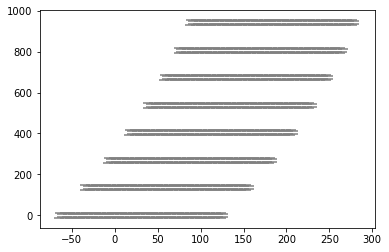

In [9]:
plt.scatter(UView['y'],UView['x'],marker='_',s=100,color='grey')
plt.scatter(VView['y'],VView['x'],marker='_',s=100,color='grey')
plt.show()

32 (32, 3)


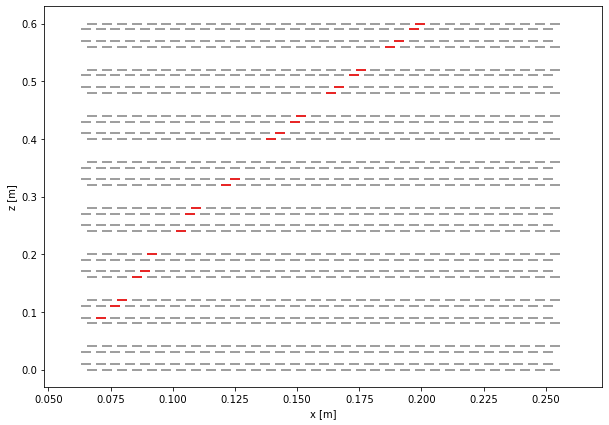

In [6]:
ev = generate_event(x_toy,z_toy,p_toy)
#ev = generate_event(-4e-2,-0.8,1.5)
#ev = generate_event(z_toy,p_toy,phi_toy)
#ev = generate_event(-0.63,2.9,0.015)
print(len(ev),ev.shape)
plot_event(ev)

In [7]:
def colorbar(mappable):
    # from https://joseph-long.com/writing/colorbars/
    #from mpl_toolkits.axes_grid1 import make_axes_locatable
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    cbar.ax.tick_params(labelsize=12)
    return cbar

def plot_1d_scan(llh_scan_res, xs, true_x, axis_label, vmax=None):
    dom_terms = np.copy(llh_scan_res)
    
    #fig, ax = plt.subplots()
    
    # subtract minimum value from each scan result
    dom_terms -= dom_terms.min()
    #if not vmax: vmax = dom_terms.max()
    
    plt.plot(xs,dom_terms,label='scan')
    plt.axvline(x=true_x,color='red',label='truth')
    #ax[0].plot([true_x], [true_y], marker='$T$', markersize=10, color='white')
    #ax[1].plot([true_x], [true_y], marker='$T$', markersize=10, color='black')
    
    plt.xlabel(axis_label)
    #plt.title(f'Log Likelihood (Gaussian)')
    plt.legend()


def plot_2d_scan(llh_scan_res, xs, ys, true_x, true_y, axis_labels, vmax=None, log=False):
    # copy to avoid modifying original scan results
    dom_terms = np.copy(llh_scan_res)
    
    if log: fig, ax = plt.subplots(1,2,figsize=(14,5)); plt.subplots_adjust(wspace=0.5)
    else: fig,ax = plt.subplots()
    gridsize = len(xs)
    
    # subtract minimum value from each scan result
    dom_terms -= dom_terms.min()
    #if not vmax: vmax = dom_terms.max()
    
    if not log: ax = [ax]
    m = ax[0].pcolormesh(xs, ys, dom_terms.reshape(gridsize, gridsize), 
                          cmap='Spectral', rasterized=True, linewidth=0, vmin=0, vmax=vmax)
    
    if log:
        mlog = ax[1].pcolormesh(xs, ys, dom_terms.reshape(gridsize, gridsize), 
                          cmap='Spectral', rasterized=True, linewidth=0, norm=colors.LogNorm(vmin=1e-3, vmax=vmax))
        
    ax[0].plot([true_x], [true_y], marker='$T$', markersize=10, color='white')
    if log: ax[1].plot([true_x], [true_y], marker='$T$', markersize=10, color='black')
    
    for axis in ax:
        axis.set_xlabel(axis_labels[0])
        axis.set_ylabel(axis_labels[1])
        #axis.set_title(f'Log Likelihood (Gaussian)')
    colorbar(m)
    if log: colorbar(mlog)

In [8]:
grid_spacing = 100

xs = np.linspace(-2e-2,2e-2,grid_spacing)

#zs = np.linspace(-1, -0.5, grid_spacing)
zs = np.linspace(-1, -0.5, grid_spacing)
#ps = np.linspace(1.5, 2.5, grid_spacing)
ps = np.linspace(1.5, 2.5, grid_spacing)
if is_full_p: ps *= 1e9/c
#phis = np.linspace(0.01, 0.06, grid_spacing)

In [9]:
N_mc = 100000#0
mc, truth = MC_events(N_mc,verbose_lvl=2)
#mc is [x,z] array

# events done: 0
# events to go: 100000
10000 events done
10000 events done
10000 events done
10000 events done
10000 events done
10000 events done
10000 events done
10000 events done
10000 events done
# events thrown out: 15923
# events done: 84077
# events to go: 15923
10000 events done
# events thrown out: 2578
# events done: 97422
# events to go: 2578
# events thrown out: 411
# events done: 99589
# events to go: 411
# events thrown out: 55
# events done: 99945
# events to go: 55
# events thrown out: 9
# events done: 99991
# events to go: 9
# events thrown out: 1
# events done: 99999
# events to go: 1
10000 events done
# events thrown out: 0


In [10]:
#neural nets

hitnet = types.SimpleNamespace() 

hitnet.events = mc
n_hits_per_event = []

for item in mc:
    #n_hits_per_event.append(item.shape[0])
    n_hits_per_event.append(np.sum(item[:,0]>0))

hitnet.events = np.concatenate(hitnet.events)
n_hits_per_event = np.array(n_hits_per_event)
#hitnet.events = np.vstack((hitnet.events.T,np.repeat(n_hits_per_event,n_hits_per_event))).T
hitnet.events = np.vstack((hitnet.events.T,np.repeat(n_hits_per_event,N_det))).T

#hitnet.truth = np.repeat(truth, n_hits_per_event, axis=0)
hitnet.truth = np.repeat(truth, N_det, axis=0)

assert hitnet.events.shape[0] == hitnet.truth.shape[0]

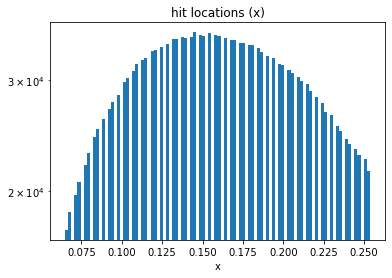

In [11]:
plt.hist(hitnet.events[:,0][hitnet.events[:,0]>0], bins=100)
plt.gca().set_yscale('log')
plt.title('hit locations (x)')
plt.xlabel('x')
plt.show()

In [12]:
def make_dataset(x, t, shuffle_block_size=2**15, batch_size=2**12):
        '''
        get a tensorflow dataset for likelihood approximation
        
        Parameters:
        -----------
        x : ndarray
            observations
        t : ndarray
            parameters        
        shuffle_block_size : int
            block size over which to shuffle, should be multiple of batch_size
        batch_size : int
        
        Returns:
        --------
        
        tf.data.Dataset
            with structure ((x, t), y) for training
        
        '''
        
        N = x.shape[0]
        assert t.shape[0] == N
        
        d_x = tf.data.Dataset.from_tensor_slices(x)
        d_t = tf.data.Dataset.from_tensor_slices(t)

        d_true_labels = tf.data.Dataset.from_tensor_slices(np.ones((N, 1), dtype=x.dtype))
        d_false_labels = tf.data.Dataset.from_tensor_slices(np.zeros((N, 1), dtype=x.dtype))

        d_xs = tf.data.Dataset.from_tensor_slices([d_x, d_x]).interleave(lambda x : x)
        d_ts = tf.data.Dataset.from_tensor_slices([d_t, d_t.shuffle(shuffle_block_size)]).interleave(lambda x : x)
        d_ys = tf.data.Dataset.from_tensor_slices([d_true_labels, d_false_labels]).interleave(lambda x : x)
        
        
        dataset = tf.data.Dataset.zip((tf.data.Dataset.zip((d_xs, d_ts)), d_ys))
  
        return dataset.batch(batch_size)



In [13]:
## charge net

hitnet.x_train, hitnet.x_test, hitnet.t_train, hitnet.t_test = train_test_split(hitnet.events, hitnet.truth, test_size=0.2, random_state=42)
hitnet.d_train = make_dataset(hitnet.x_train, hitnet.t_train)
hitnet.d_test = make_dataset(hitnet.x_test, hitnet.t_test)

In [14]:
class trafo(tf.keras.layers.Layer):

    def call(self, hits, theta):
        dz = hits[:,1]-theta[:,1]
        dx = hits[:,0]-theta[:,0]
        out = tf.stack([
                 hits[:,0],
                 hits[:,1],
                 hits[:,2],
                 hits[:,3],
                 #dx,dz,
                 #px,
                 #pz,
                 theta[:,0],
                 theta[:,1],
                 theta[:,2]
                ],
                axis=1
                )
#        out = tf.concat([charges[:,:1],r2,theta],axis=1)
        return out

#class trafo(tf.keras.layers.Layer):
#    def call(self, hits, theta):
#        locs = detector_loc(N_det)
#        r2 = tf.math.square(locs - tf.reshape(theta[:,0],[-1,1])) + tf.math.square(tf.reshape(theta[:,1],[-1,1]))
#        out = tf.concat([hits,r2,theta],axis=1)
        #out = tf.concat([hits,theta],axis=1)
#        return out
    
hitnet.trafo = trafo

In [15]:
activation='relu'

x_input = tf.keras.Input(shape=(hitnet.x_train.shape[1],))
t_input = tf.keras.Input(shape=(hitnet.t_train.shape[1],))

h = hitnet.trafo()(x_input, t_input)

#h = tf.keras.layers.Dense(8, activation=activation)(h)

#h = tf.keras.layers.Dense(16, activation=activation)(h)
#h = tf.keras.layers.Dropout(0.01)(h)

h = tf.keras.layers.Dense(32, activation=activation)(h)
h = tf.keras.layers.Dropout(0.01)(h)

h = tf.keras.layers.Dense(64, activation=activation)(h)
h = tf.keras.layers.Dropout(0.01)(h)

h = tf.keras.layers.Dense(128, activation=activation)(h)
h = tf.keras.layers.Dropout(0.01)(h)

h = tf.keras.layers.Dense(64, activation=activation)(h)
h = tf.keras.layers.Dropout(0.01)(h)

h = tf.keras.layers.Dense(32, activation=activation)(h)
h = tf.keras.layers.Dropout(0.01)(h)

#h = tf.keras.layers.Dense(16, activation=activation)(h)
#h = tf.keras.layers.Dropout(0.01)(h)

#h = tf.keras.layers.Dense(8, activation=activation)(h)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(h)

hitnet.model = tf.keras.Model(inputs=[x_input, t_input], outputs=outputs)
hitnet.model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
trafo (trafo)                   (None, 7)            0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 32)           256         trafo[0][0]                  

In [16]:
optimizer = tf.keras.optimizers.Adam(0.001)
hitnet.model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [17]:
hitnet.hist = hitnet.model.fit(hitnet.d_train, epochs=4, verbose=1, validation_data=hitnet.d_test)

Epoch 1/4
1250/1250 [==============================] - 98s 78ms/step - loss: 0.5822 - val_loss: 0.4004
Epoch 2/4
1250/1250 [==============================] - 103s 83ms/step - loss: 0.3958 - val_loss: 0.2695
Epoch 3/4
1250/1250 [==============================] - 99s 79ms/step - loss: 0.3555 - val_loss: 0.2661
Epoch 4/4
1250/1250 [==============================] - 90s 72ms/step - loss: 0.3153 - val_loss: 0.2360


In [110]:
#n_epochs = 5
#for i in range(n_epochs):
#    hitnet.d_train = make_dataset(hitnet.x_train, hitnet.t_train)
#    hitnet.d_test = make_dataset(hitnet.x_test, hitnet.t_test)
#    hitnet.hist = hitnet.model.fit(hitnet.d_train, epochs=1, verbose=1, validation_data=hitnet.d_test)

hitnet.hist = hitnet.model.fit(hitnet.d_train, epochs=5, verbose=1, validation_data=hitnet.d_test)

Epoch 1/5
1250/1250 [==============================] - 86s 69ms/step - loss: 0.3160 - val_loss: 0.2688
Epoch 2/5
1250/1250 [==============================] - 84s 67ms/step - loss: 0.2963 - val_loss: 0.2531
Epoch 3/5
1250/1250 [==============================] - 78s 63ms/step - loss: 0.2816 - val_loss: 0.2384
Epoch 4/5
1250/1250 [==============================] - 85s 68ms/step - loss: 0.2690 - val_loss: 0.2361
Epoch 5/5
1250/1250 [==============================] - 90s 72ms/step - loss: 0.2603 - val_loss: 0.2243


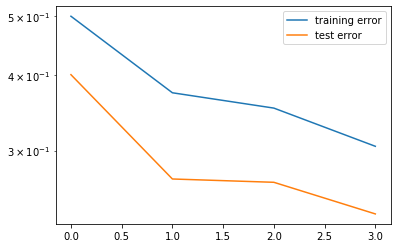

In [18]:
plt.plot(hitnet.model.history.history['loss'],label='training error')
plt.plot(hitnet.model.history.history['val_loss'],label='test error')
plt.gca().set_yscale('log')
plt.legend()
plt.show()

hitnet.llh = tf.keras.models.clone_model(hitnet.model)
hitnet.llh.set_weights(hitnet.model.get_weights())
hitnet.llh.layers[-1].activation = tf.keras.activations.linear
hitnet.llh.compile()

In [62]:
_x = stats.truncnorm(-4.5,4.5,scale=0.01).pdf(xs)
_z = stats.truncnorm(-4,4,loc=1,scale=0.25).pdf(zs)
_p = stats.truncnorm(-1.9/0.6,1.6/0.6,loc=1.9,scale=0.6).pdf(ps)

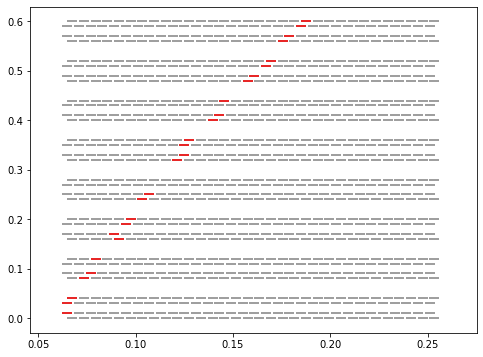

In [46]:
x_toy = np.random.uniform(-2.5e-2,2.5e-2) #should be Gaussian
z_toy = np.random.uniform(-1, -0.5) #should be Gaussian
p_toy = np.random.uniform(0.5,3.5)

ev = generate_event(x_toy,z_toy,p_toy)
plot_event(ev)

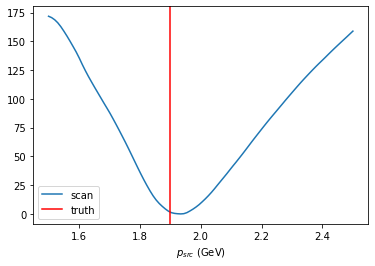

In [19]:
len_ev = np.sum(ev[:,0]>0)

scan_t = np.vstack([np.ones(grid_spacing)*x_toy,np.ones(grid_spacing)*z_toy,ps]).T
scan_t = np.repeat(scan_t,len(ev),axis=0)

scan_x = np.tile(ev[:,0],grid_spacing)
#scan_x = np.vstack((scan_x,np.tile(ev[:,1],grid_spacing),len_ev*np.ones(grid_spacing*len(ev)))).T
scan_x = np.vstack((scan_x,np.tile(ev[:,1],grid_spacing),np.tile(ev[:,2],grid_spacing),len_ev*np.ones(grid_spacing*len(ev)))).T

nn_p_scan = hitnet.llh.predict([scan_x,scan_t])

nn_p_scan = -np.sum(nn_p_scan.reshape(-1,len(ev)),axis=1)
plot_1d_scan(nn_p_scan, ps, p_toy, axis_label='$p_{src}$ (GeV)')

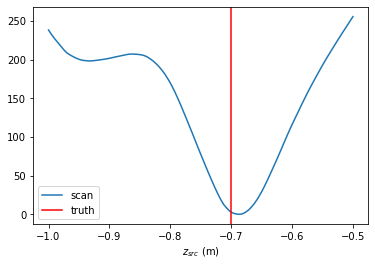

In [20]:
scan_t = np.vstack([np.ones(grid_spacing)*x_toy,zs,np.ones(grid_spacing)*p_toy]).T
scan_t = np.repeat(scan_t,len(ev),axis=0)

scan_x = np.tile(ev[:,0],grid_spacing)
#scan_x = np.vstack((scan_x,np.tile(ev[:,1],grid_spacing),len_ev*np.ones(grid_spacing*len(ev)))).T
scan_x = np.vstack((scan_x,np.tile(ev[:,1],grid_spacing),np.tile(ev[:,2],grid_spacing),len_ev*np.ones(grid_spacing*len(ev)))).T

nn_z_scan = hitnet.llh.predict([scan_x,scan_t])

nn_z_scan = -np.sum(nn_z_scan.reshape(-1,len(ev)),axis=1)
plot_1d_scan(nn_z_scan, zs, z_toy, axis_label='$z_{src}$ (m)')

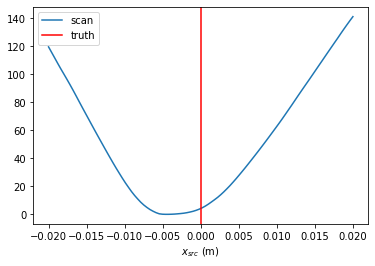

In [21]:
scan_t = np.vstack([xs,np.ones(grid_spacing)*z_toy,np.ones(grid_spacing)*p_toy]).T
scan_t = np.repeat(scan_t,len(ev),axis=0)

scan_x = np.tile(ev[:,0],grid_spacing)
#scan_x = np.vstack((scan_x,np.tile(ev[:,1],grid_spacing),len_ev*np.ones(grid_spacing*len(ev)))).T
scan_x = np.vstack((scan_x,np.tile(ev[:,1],grid_spacing),np.tile(ev[:,2],grid_spacing),len_ev*np.ones(grid_spacing*len(ev)))).T

#nn_phi_scan = hitnet.llh.predict([scan_x,scan_t])
nn_x_scan = hitnet.llh.predict([scan_x,scan_t])

#nn_phi_scan = -np.sum(nn_phi_scan.reshape(-1,len(ev)),axis=1)
#plot_1d_scan(nn_phi_scan, phis, phi_toy, axis_label=r'$\varphi_{src}$ (rad)')
nn_x_scan = -np.sum(nn_x_scan.reshape(-1,len(ev)),axis=1)
plot_1d_scan(nn_x_scan, xs, x_toy, axis_label='$x_{src}$ (m)')

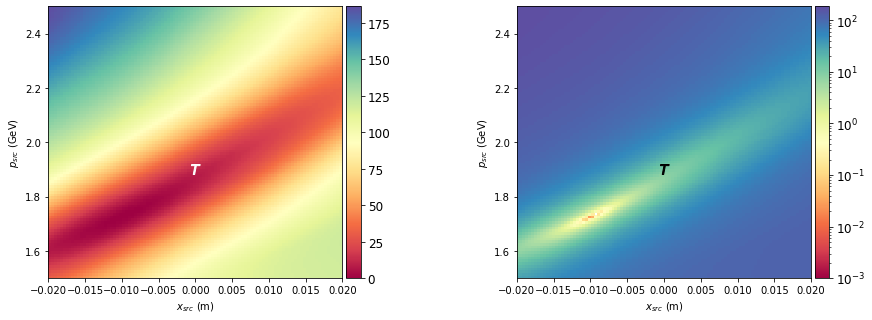

In [34]:
#change phi to x

mg = np.meshgrid(xs,ps)

hitnet.grid_t = np.vstack([mg[0].flatten(),np.ones(grid_spacing**2)*z_toy,mg[1].flatten()]).T
hitnet.grid_t = np.repeat(hitnet.grid_t,len(ev),axis=0)

hitnet.grid_x = np.tile(ev[:,0],grid_spacing**2)
#hitnet.grid_x = np.vstack((hitnet.grid_x,np.tile(ev[:,1],grid_spacing**2),len_ev*np.ones(grid_spacing**2*len(ev)))).T
hitnet.grid_x = np.vstack((hitnet.grid_x,np.tile(ev[:,1],grid_spacing**2),np.tile(ev[:,2],grid_spacing**2),len_ev*np.ones(grid_spacing**2*len(ev)))).T

hitnet.grid_llh = hitnet.llh.predict([hitnet.grid_x,hitnet.grid_t])

NN_x_p_scan = -np.sum(hitnet.grid_llh.reshape(-1, len(ev)), axis=1)
plot_2d_scan(NN_x_p_scan, xs, ps, x_toy, p_toy, 
            axis_labels=['$x_{src}$ (m)','$p_{src}$ (GeV)'],log=True)

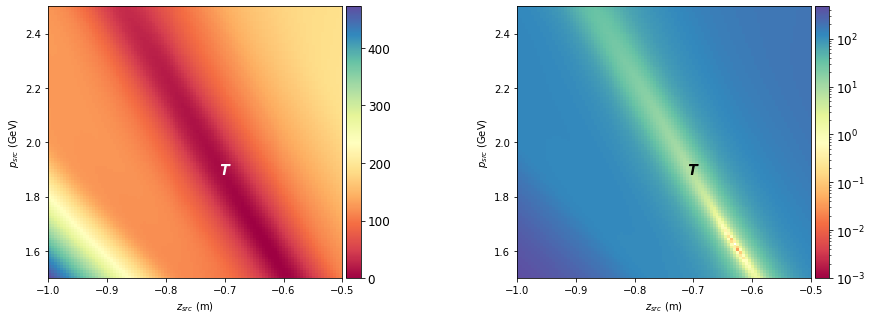

In [35]:
mg = np.meshgrid(zs,ps)

hitnet.grid_t = np.vstack([np.ones(grid_spacing**2)*x_toy,mg[0].flatten(),mg[1].flatten()]).T
hitnet.grid_t = np.repeat(hitnet.grid_t,len(ev),axis=0)

hitnet.grid_x = np.tile(ev[:,0],grid_spacing**2)
#hitnet.grid_x = np.vstack((hitnet.grid_x,np.tile(ev[:,1],grid_spacing**2),len_ev*np.ones(grid_spacing**2*len(ev)))).T
hitnet.grid_x = np.vstack((hitnet.grid_x,np.tile(ev[:,1],grid_spacing**2),np.tile(ev[:,2],grid_spacing**2),len_ev*np.ones(grid_spacing**2*len(ev)))).T

hitnet.grid_llh = hitnet.llh.predict([hitnet.grid_x,hitnet.grid_t])

NN_z_p_scan = -np.sum(hitnet.grid_llh.reshape(-1, len(ev)), axis=1)
plot_2d_scan(NN_z_p_scan, zs, ps, z_toy, p_toy, 
            axis_labels=['$z_{src}$ (m)', '$p_{src}$ (GeV)'],log=True)

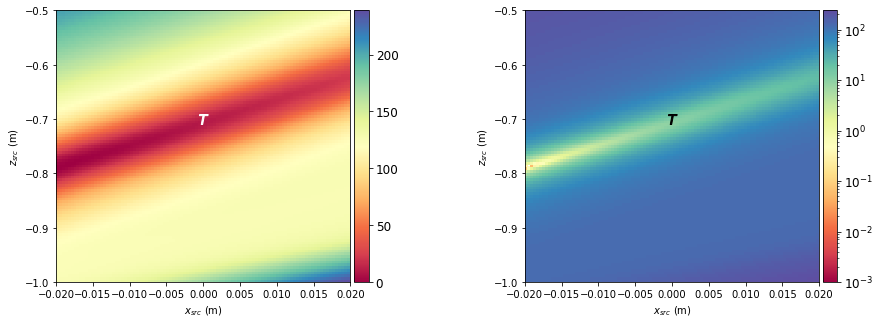

In [36]:
mg = np.meshgrid(xs,zs)

hitnet.grid_t = np.vstack([mg[0].flatten(),mg[1].flatten(),np.ones(grid_spacing**2)*p_toy]).T
hitnet.grid_t = np.repeat(hitnet.grid_t,len(ev),axis=0)

hitnet.grid_x = np.tile(ev[:,0],grid_spacing**2)
#hitnet.grid_x = np.vstack((hitnet.grid_x,np.tile(ev[:,1],grid_spacing**2),len_ev*np.ones(grid_spacing**2*len(ev)))).T
hitnet.grid_x = np.vstack((hitnet.grid_x,np.tile(ev[:,1],grid_spacing**2),np.tile(ev[:,2],grid_spacing**2),len_ev*np.ones(grid_spacing**2*len(ev)))).T

hitnet.grid_llh = hitnet.llh.predict([hitnet.grid_x,hitnet.grid_t])

NN_x_z_scan = -np.sum(hitnet.grid_llh.reshape(-1, len(ev)), axis=1)
plot_2d_scan(NN_x_z_scan, xs, zs, x_toy, z_toy, 
            axis_labels=['$x_{src}$ (m)', '$z_{src}$ (m)'],log=True)

In [22]:
def llh_fun(theta,event):
    #theta is array [x,z,p]
    #event is nx2 array
    len_ev = np.sum(event[:,0]>0)
    
    params = np.tile(theta,len(event)).reshape((len(event),-1))
    #print(params) 
    obs = np.vstack((event.T,len_ev*np.ones(len(event)))).T
    
    #pred = hitnet.llh.predict([event,params])
    pred = hitnet.llh.predict([obs,params])
    #print(pred)
    return -np.sum(pred)

In [23]:
print(x_toy,z_toy,p_toy)
print(llh_fun([x_toy,z_toy,p_toy],ev))

0 -0.7 1.9
-70.29969


In [24]:
opt_params = minimize(llh_fun,[2e-2,-1,2],args=(ev),method='Nelder-Mead',options={'maxiter':100000,'disp':True})

print(opt_params)

Optimization terminated successfully.
         Current function value: -77.078636
         Iterations: 152
         Function evaluations: 272
 final_simplex: (array([[ 0.00401581, -0.58794837,  1.61527072],
       [ 0.00402312, -0.58789403,  1.61518614],
       [ 0.00401391, -0.58796538,  1.61530237],
       [ 0.00401566, -0.58795076,  1.61527768]]), array([-77.07863617, -77.07857513, -77.07855988, -77.07853699]))
           fun: -77.0786361694336
       message: 'Optimization terminated successfully.'
          nfev: 272
           nit: 152
        status: 0
       success: True
             x: array([ 0.00401581, -0.58794837,  1.61527072])


In [42]:
lims = Bounds([-2.5e-2,-1,0.5],[2.5e-2,-0.5,3.5],keep_feasible=True)#
opt_params = minimize(llh_fun,[2e-2,-1,2],args=(ev),method='Powell',bounds=[(-2.5e-2,2.5e-2),(-1,-0.5),(0.5,3.5)],options={'maxiter':100000,'disp':True,'return_all':True})

print(opt_params)

Optimization terminated successfully.
         Current function value: -83.625290
         Iterations: 4
         Function evaluations: 209
 allvecs: [array([ 0.02, -1.  ,  2.  ]), array([-0.02495242, -0.83199312,  2.00457201]), array([-0.02409064, -0.82932008,  2.0072863 ]), array([-0.0180056 , -0.8104088 ,  2.02317265]), array([-0.01799482, -0.81030616,  2.02297315])]
   direc: array([[0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.005728  , 0.017767  , 0.01804124]])
     fun: -83.62529
 message: 'Optimization terminated successfully.'
    nfev: 209
     nit: 4
  status: 0
 success: True
       x: array([-0.01799482, -0.81030616,  2.02297315])


In [144]:
opt_params = minimize(llh_fun,[0,-0.5,2],args=(ev),method='Nelder-Mead',options={'maxiter':100000,'disp':True})

print(opt_params)

Optimization terminated successfully.
         Current function value: -86.071060
         Iterations: 140
         Function evaluations: 246
 final_simplex: (array([[-0.03400283, -0.9312827 ,  2.24420036],
       [-0.03400261, -0.9312898 ,  2.24421586],
       [-0.03399327, -0.93121943,  2.24410697],
       [-0.03400369, -0.93130042,  2.24424069]]), array([-86.07106018, -86.07102966, -86.07102203, -86.07099915]))
           fun: -86.07106018066406
       message: 'Optimization terminated successfully.'
          nfev: 246
           nit: 140
        status: 0
       success: True
             x: array([-0.03400283, -0.9312827 ,  2.24420036])


In [44]:
opt_params = minimize(llh_fun,[0,-0.5,2],args=(ev),method='Powell',bounds=[(-2.5e-2,2.5e-2),(-1,-0.5),(0.5,3.5)],options={'maxiter':100000,'disp':True})

print(opt_params)

Optimization terminated successfully.
         Current function value: -86.532562
         Iterations: 6
         Function evaluations: 367
   direc: array([[-4.41924460e-03, -1.34311218e-03, -6.15636392e-02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.31447188e-03, -2.70174703e-04, -1.02248921e-02]])
     fun: -86.53256
 message: 'Optimization terminated successfully.'
    nfev: 367
     nit: 6
  status: 0
 success: True
       x: array([ 0.00545289, -0.61547527,  1.69690064])


In [25]:
#test if result from minimizer gives same event?
test_ev = generate_event(*opt_params.x)
#print(ev)
#print(len(test_ev))
#print(test_ev)
print(ev-test_ev)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.00000000e-03  0.00000000e+00 -5.27174953e-04]
 [ 6.00000000e-03  0.00000000e+00  3.90057162e-04]
 [ 6.00000000e-03  0.00000000e+00  5.05320413e-04]
 [ 6.00000000e-03  0.00000000e+00 -4.82028193e-04]
 [ 6.00000000e-03  0.00000000e+00  5.38368356e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.15000000e-02  0.00000000e+00  2.18213215e-03]
 [ 6.00000000e-03  0.00000000e+00  1.02137135e-03]
 [-1.01000000e-01  0.00000000e+00 -1.34088868e-03]
 [ 1.07000000e-01  0.00000000e+00  1.89791805e-03]
 [ 1.09500000e-01  0.00000000e+00  1.61001316e-03]
 [ 6.00000000e-03  0.00000000e+00 -4.21663113e-04]
 [ 6.00000000e-03  0.00000000e+00  1.74391311e-03]
 [-1.25000000e-01  0.00000000e+00 -9.01672312e-04]
 [-1.27500000e-01  0.00000000e+

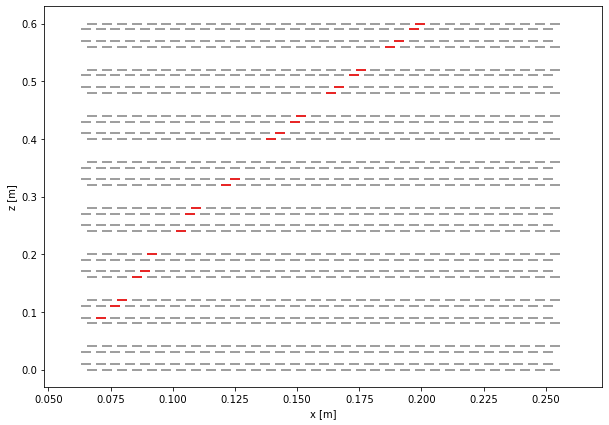

In [26]:
plot_event(ev)

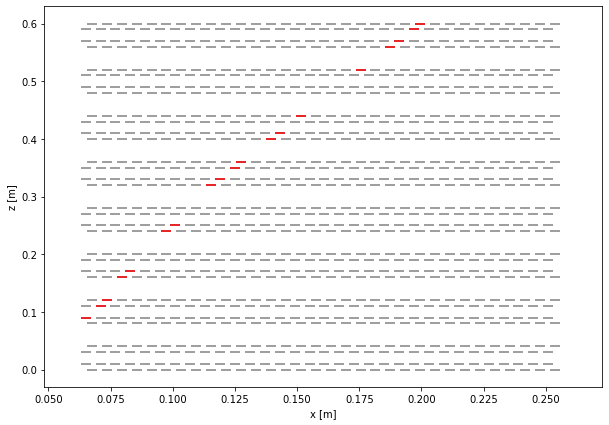

In [27]:
plot_event(test_ev)